<a href="https://colab.research.google.com/github/SethuSA/CMP7005-Programming-for-data-analysis/blob/main/Final_Assignment_CMP7005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CMP7005-PRAC1 Indian Air Quality**


In [10]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /'/content/drive/MyDrive/Colab/xx'

/content/drive/MyDrive/Colab/xx


In [ ]:
%ls

Ahmedabad_data.csv       Chennai_data.csv     Kolkata_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Lucknow_data.csv
all_cities_combined.csv  Delhi_data.csv       Mumbai_data.csv
all_cities_merged.csv    Ernakulam_data.csv   Patna_data.csv
Amaravati_data.csv       Gurugram_data.csv    rf_model.pkl
Amritsar_data.csv        Guwahati_data.csv    Shillong_data.csv
Bengaluru_data.csv       Hyderabad_data.csv   Talcher_data.csv
Bhopal_data.csv          Jaipur_data.csv      Thiruvananthapuram_data.csv
Brajrajnagar_data.csv    Jorapokhar_data.csv  Visakhapatnam_data.csv
Chandigarh_data.csv      Kochi_data.csv


In [ ]:
# Load the combined air quality dataset
df=pd.read_csv("all_cities_combined.csv")

# Display the first few rows of the dataset
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Bhopal,17/09/2019,23.12,43.95,13.38,38.58,31.40,34.63,1.52,10.53,41.86,NaN,NaN,NaN,NaN,NaN
1,Bhopal,18/09/2019,21.25,38.20,16.08,37.81,33.18,44.14,1.38,8.95,24.70,NaN,NaN,NaN,89.0,Satisfactory
2,Bhopal,19/09/2019,16.94,41.09,12.94,25.28,23.96,47.43,0.95,8.08,31.66,NaN,NaN,NaN,77.0,Satisfactory
3,Bhopal,20/09/2019,15.29,43.10,11.93,26.05,23.56,42.29,0.95,7.52,30.93,NaN,NaN,NaN,76.0,Satisfactory
4,Bhopal,21/09/2019,20.75,62.70,14.90,30.90,28.55,46.25,1.41,7.31,27.19,NaN,NaN,NaN,82.0,Satisfactory


In [ ]:
# Imports for this file
import pandas as pd
import numpy as np
import glob
import os

# For nicer Display
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


In [11]:
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (29531, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Task-1 Data handling

In [12]:
csv_files = glob.glob("//content/drive/MyDrive/Colab/xx/*_data.csv")
print("Number of CSV files found:", len(csv_files))



Number of CSV files found: 26


In [13]:
# Sorting file list
csv_files = sorted(csv_files)
print("Files found:")
for f in csv_files:
    print("  -", os.path.basename(f))

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv


In [14]:
data_path = "/content/drive/MyDrive/Colab/xx/*_data.csv"

# Find all CSV files in the folder
csv_files = [f for f in glob.glob(data_path) if "all_cities_combined" not in f]

print("Number of CSV files found:", len(csv_files))

csv_files = sorted(csv_files)
print("\nFiles found:")
for f in csv_files:
    print("  -", os.path.basename(f))

# Merge all city datasets
df_list = []

for file_path in csv_files:
    file_name = os.path.basename(file_path)
    city_name = file_name.replace("_data.csv", "")

    print(f"\nLoading: {city_name}")

    df_city = pd.read_csv(file_path)
    df_city["City"] = city_name

    df_list.append(df_city)

all_data = pd.concat(df_list, ignore_index=True)

print("\n Merged dataset created successfully!")
print("Shape:", all_data.shape)

# Save merged dataset back to Drive
merged_save_path = "//content/drive/MyDrive/Colab/xx/all_cities_merged.csv"
all_data.to_csv(merged_save_path, index=False)

print("\nMerged file saved to:", merged_save_path)


Number of CSV files found: 26

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv

Loading: Ahmedabad

Loading: Aizawl

Loading: Amaravati

Loading: Amritsar

Loading: Bengaluru

Loading: Bhopal

Loading: Brajrajnagar

Loading: Chandigarh

Loading: Chennai

Loading: Coimbatore

Loading: Delhi

Loading: Ernakulam

Loading: Gurugram

Loading: Guwahati

Loading: Hyderabad

Loading: Jaipur

Loading: Jorapokhar

Loading: Kochi

Loading: Kolkata

Loading: Luc

**Task 1: Data Handling**

In this step, I combined multiple city-wise air quality datasets into a single master DataFrame. Each CSV file represents measurements from one Indian city and follows a similar column structure.

To avoid hard-coding file names, I used the `glob` library to automatically detect all files ending with `_data.csv` in the working directory. For each file, I extracted the city name from the filename (e.g. `Ahmedabad_data.csv` → `Ahmedabad`) and stored it in a new `City` column. I then loaded each CSV into a separate pandas DataFrame and concatenated all of them into one dataset called `all_data`.

This merged dataset contains air quality measurements for multiple cities across India and will be used as the basis for all further exploratory analysis and modelling.


Task2(a) **Fundamental Data understanding**

Fundamental Data Understanding
After constructing the merged dataset, I performed an initial exploration to understand its structure and quality. I inspected the first few rows, checked the overall shape (number of rows and columns), and listed all column names. I also examined data types and non-null counts to identify which variables are numerical and which contain missing values.

Using `describe()`, I generated summary statistics for the numerical features to get a sense of their typical ranges and variability. I then calculated the number of missing values per column and counted duplicate rows. Finally, I verified that the `City` column correctly lists all the different cities present in the dataset, and I converted the `Date` column to a proper datetime format.

This fundamental understanding step helps to reveal potential data quality issues (such as missing or inconsistent values) and confirms that the merging process across multiple city files was successful.


In [16]:
# Finding missing values per column
print(all_data.isna().sum())


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


→ Key Observations:
- *Xylene* has extremely high missing values around92%, its not usabale, so should be droped
- *PM10, NH3, Toluene* also have the large gaps but still usable after imputation
- *AQI* and *AQI_Bucket* missing together
- City and Data are complete

In [15]:
# Task 2 Data Pre-processing
clean_data = all_data.copy()

# 1. Drop columns with extremely high missing values
threshold = 0.80  # drop columns with >80% missing values
cols_to_drop = []

for col in clean_data.columns:
    missing_ratio = clean_data[col].isna().mean()
    if missing_ratio > threshold:
        cols_to_drop.append(col)

print("Columns dropped due to excessive missing values:", cols_to_drop)

clean_data.drop(columns=cols_to_drop, inplace=True, errors="ignore")

# 2. Convert Date column to datetime
clean_data["Date"] = pd.to_datetime(clean_data["Date"], errors="coerce")

# Extract Year & Month for analysis
clean_data["Year"] = clean_data["Date"].dt.year
clean_data["Month"] = clean_data["Date"].dt.month


# 3. Remove duplicate rows
duplicates = clean_data.duplicated().sum()
print("Duplicate rows:", duplicates)

clean_data.drop_duplicates(inplace=True)

# 4. City-wise median imputation for pollutants

pollutant_columns = [
    col for col in clean_data.columns
    if col not in ["City", "Date", "AQI_Bucket", "Year", "Month"]
    and clean_data[col].dtype != "object"
]

print("Numeric pollutant columns to impute:", pollutant_columns)

# Apply median imputation grouped by city
for col in pollutant_columns:
    clean_data[col] = clean_data.groupby("City")[col].transform(
        lambda x: x.fillna(x.median())
    )


# 5. Fix AQI and AQI_Bucket issues
# Simple fill of AQI missing using city median (baseline approach)
if "AQI" in clean_data.columns:
    clean_data["AQI"] = clean_data.groupby("City")["AQI"].transform(
        lambda x: x.fillna(x.median())
    )

# If AQI_Bucket still missing, fill with "Unknown"
if "AQI_Bucket" in clean_data.columns:
    clean_data["AQI_Bucket"] = clean_data["AQI_Bucket"].fillna("Unknown")

print("\nPre-processing complete!")
print("Final dataset shape:", clean_data.shape)


Columns dropped due to excessive missing values: []
Duplicate rows: 1418
Numeric pollutant columns to impute: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

Pre-processing complete!
Final dataset shape: (28113, 18)


Task2 c - **Statistical and Visual Analysis**

In this section, a range of visualisation techniques are used to explore the cleaned
air quality dataset. The analysis focuses on understanding pollutant distributions,
comparing air quality across cities, examining temporal trends, and analysing
relationships between pollutants and AQI. These visual insights support the
identification of key patterns and inform subsequent modelling decisions.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Theme
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

# confirm columns:
clean_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene',
       'AQI', 'AQI_Bucket', 'Year', 'Month'],
      dtype='object')

###  Univariate Analysis of Key Variables

Univariate analysis was conducted to examine the distribution of key pollutants
and AQI values. Histogram plots with kernel density estimates (KDE) were used
to understand the spread, skewness, and frequency of observations.



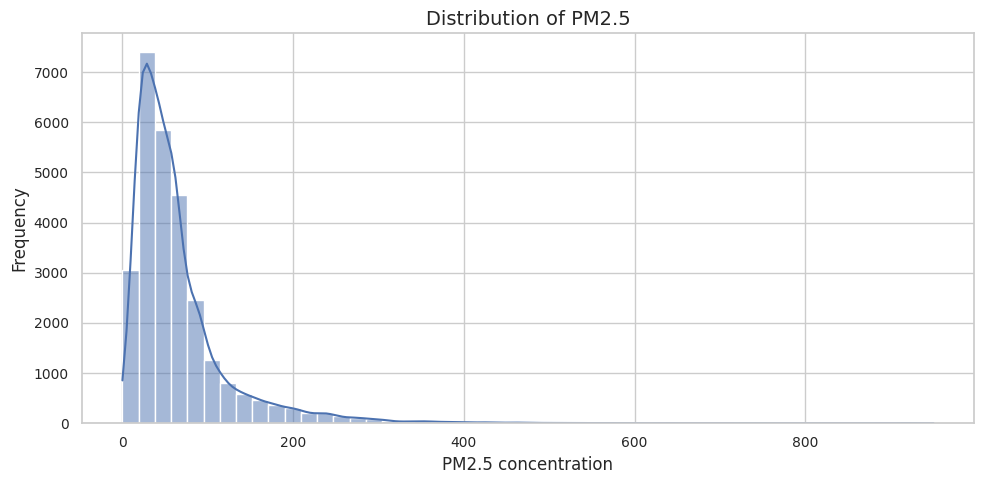

In [18]:
# Distribution of PM2.5
plt.figure()
sns.histplot(clean_data["PM2.5"], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


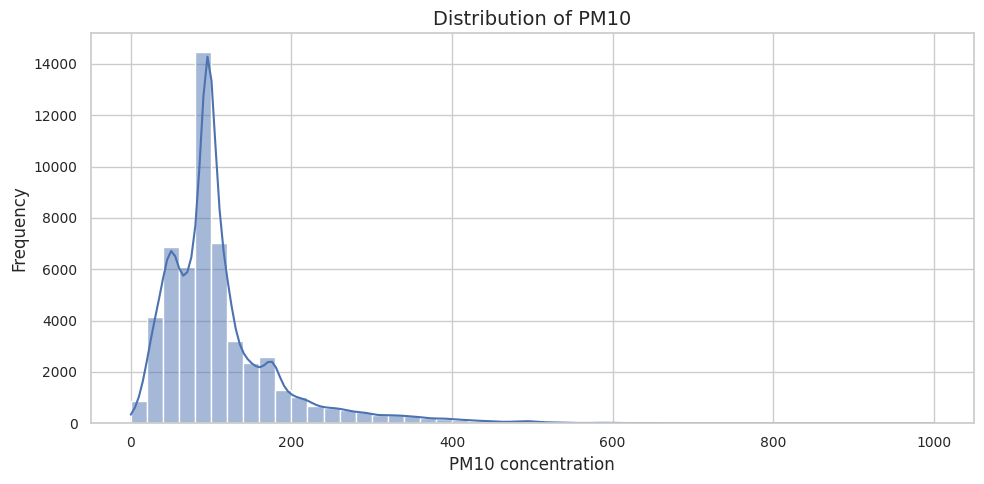

In [ ]:
# PM10 distibution
plt.figure()
sns.histplot(clean_data["PM10"], bins=50, kde=True)
plt.title("Distribution of PM10")
plt.xlabel("PM10 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


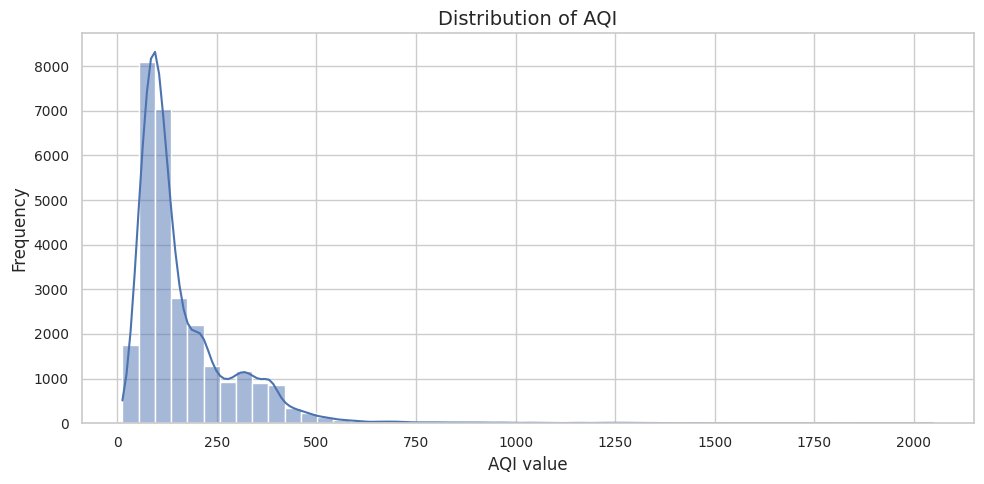

In [19]:
# AQI distribution
plt.figure()
sns.histplot(clean_data["AQI"], bins=50, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


###City-Level Comparison of Air Quality

To compare air quality across locations, boxplots were used to visualise PM2.5
concentrations across selected major Indian cities. Boxplots highlight differences
in central tendency, variability, and the presence of extreme pollution events.


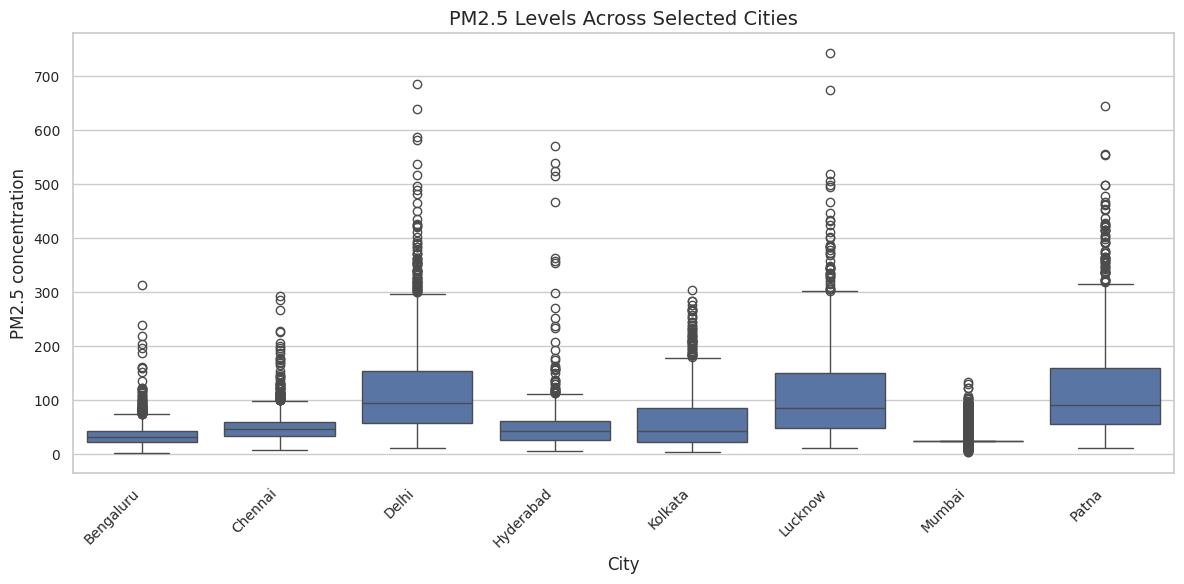

In [20]:
selected_cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Hyderabad",
                   "Bengaluru", "Lucknow", "Patna"]

subset = clean_data[clean_data["City"].isin(selected_cities)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="City", y="PM2.5", data=subset)
plt.title("PM2.5 Levels Across Selected Cities")
plt.xlabel("City")
plt.ylabel("PM2.5 concentration")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


The boxplots show substantial variation in PM2.5 levels across cities. Some cities
exhibit wider interquartile ranges and more extreme upper outliers, indicating
frequent high-pollution events, while others show more stable pollution patterns.


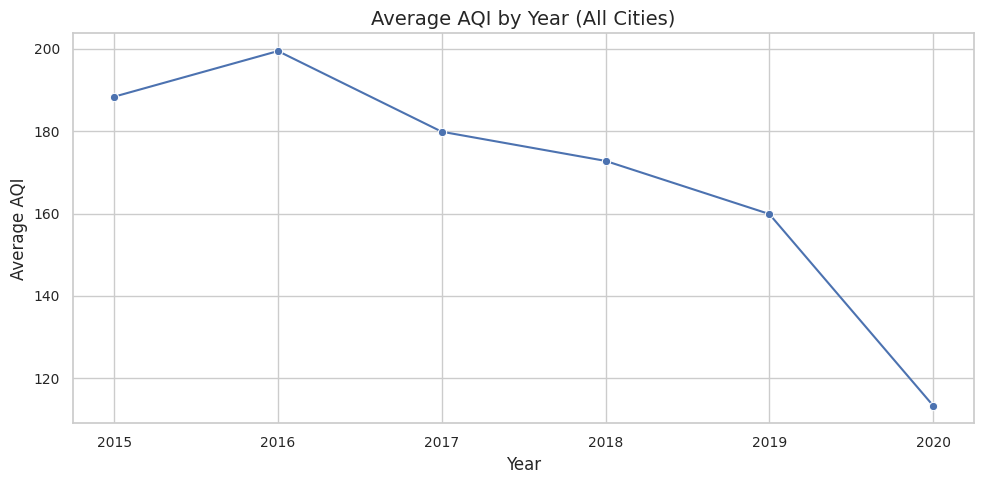

In [21]:
# Overall yearly mean AQI
yearly_aqi = clean_data.groupby("Year")["AQI"].mean()

plt.figure()
sns.lineplot(x=yearly_aqi.index, y=yearly_aqi.values, marker="o")
plt.title("Average AQI by Year (All Cities)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.show()


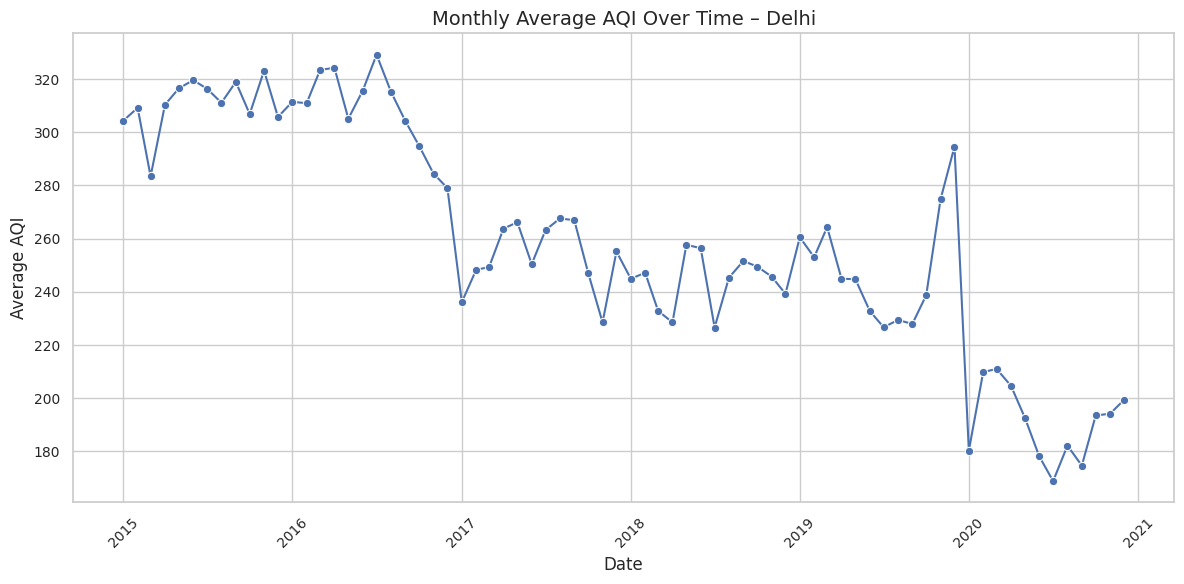

In [22]:
city_name = "Delhi"  # change to any city name
city_df = clean_data[clean_data["City"] == city_name]

# Monthly AQI
monthly_aqi = city_df.groupby(["Year", "Month"])["AQI"].mean().reset_index()

# Convert types
monthly_aqi["Year"] = monthly_aqi["Year"].astype(int)
monthly_aqi["Month"] = monthly_aqi["Month"].astype(int)

# Create date column
monthly_aqi["YearMonth"] = pd.to_datetime(
    monthly_aqi["Year"].astype(str) + "-" + monthly_aqi["Month"].astype(str) + "-01",
    format="%Y-%m-%d"
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="YearMonth", y="AQI", data=monthly_aqi, marker="o")
plt.title(f"Monthly Average AQI Over Time – {city_name}")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Correlation Analysis

A correlation heatmap was used to examine relationships between pollutant
concentrations and AQI. This analysis helps identify which pollutants are most
strongly associated with changes in AQI values.


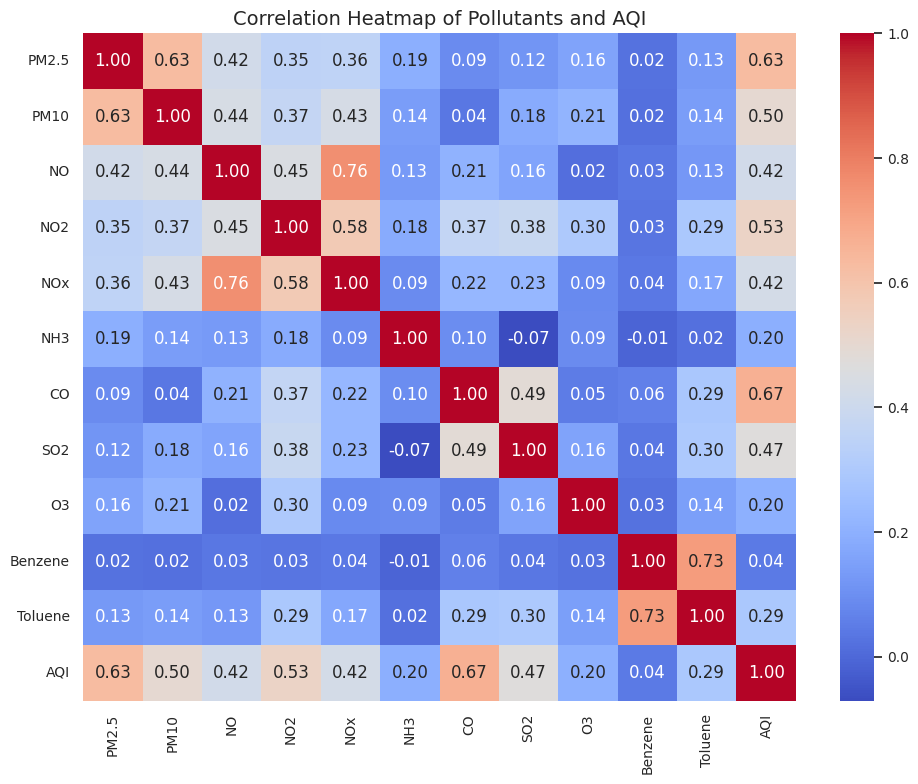

In [23]:
# Select numeric columns for correlation
num_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "AQI"]
num_cols = [c for c in num_cols if c in clean_data.columns]

corr_matrix = clean_data[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.tight_layout()
plt.show()


#### Relationship between pollutants and AQI

To understand how different pollutants relate to each other and to the AQI, I computed a correlation matrix and visualised it as a heatmap. The heatmap reveals which pollutants are strongly positively correlated (e.g. PM2.5 and PM10) and which have weaker relationships.

As expected, AQI tends to show relatively strong positive correlations with particulate matter (PM2.5, PM10) and certain gaseous pollutants. This confirms that these variables are key drivers of overall air quality and should be considered as important features in the subsequent modelling stage.


AQI Category Distribution

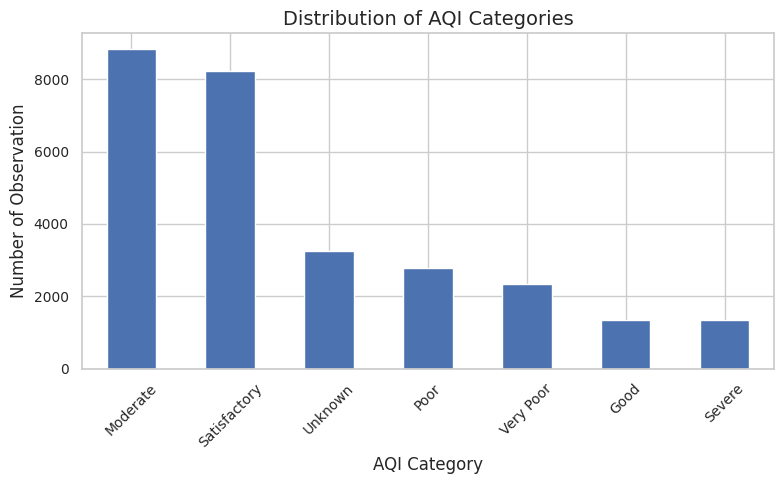

In [24]:
# Distribution of AQI categories
plt.figure(figsize=(8, 5))
clean_data["AQI_Bucket"].value_counts().plot(kind="bar")
plt.xlabel("AQI Category")
plt.ylabel("Number of Observation")
plt.title("Distribution of AQI Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



This bar charts shows the distribution of AQI categories across the dataset.A large proportion of observations fall into the moderate and poor categories,indicating widespread air quality issues across multiple cities

### Smoothed Trend Analysis of AQI

To analyse short-term temporal patterns in air quality, a 7-day rolling average
of AQI values was calculated for a selected city (Delhi). This smoothing technique
reduces daily fluctuations and highlights underlying trends in air quality over time.

The smoothed AQI curve provides a clearer view of persistent pollution periods and
seasonal variations, which may be influenced by meteorological conditions and
human activities.


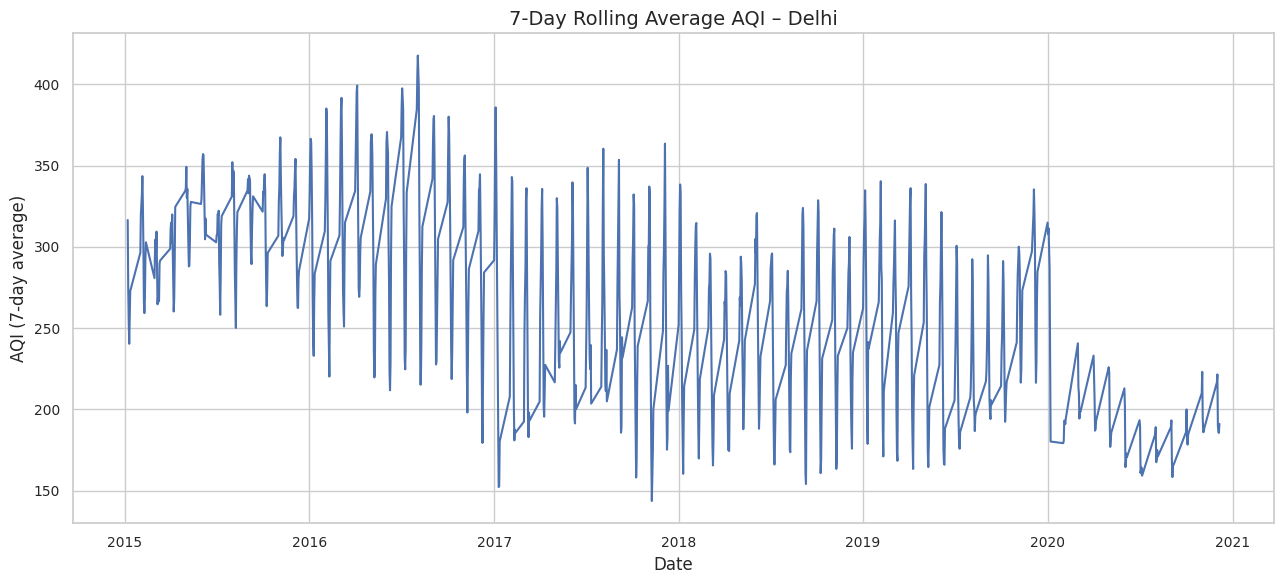

In [25]:
# 7-day rolling average AQI for a selected city
city = "Delhi"

# Filter data for the selected city and sort by date
city_df = clean_data[clean_data["City"] == city].sort_values("Date")

# Calculate 7-day rolling average of AQI
city_df["AQI_7day"] = city_df["AQI"].rolling(window=7).mean()

# Plot the smoothed AQI trend
plt.figure(figsize=(13, 6))
sns.lineplot(x="Date", y="AQI_7day", data=city_df)
plt.title(f"7-Day Rolling Average AQI – {city}")
plt.xlabel("Date")
plt.ylabel("AQI (7-day average)")
plt.tight_layout()
plt.show()


### Relationship Between PM2.5 and AQI

To further investigate the relationship between particulate matter and air quality,
a scatter plot was used to visualise the association between PM2.5 concentration
and AQI values. This analysis helps assess whether higher PM2.5 levels are
associated with increased AQI, which is important for predictive modelling.


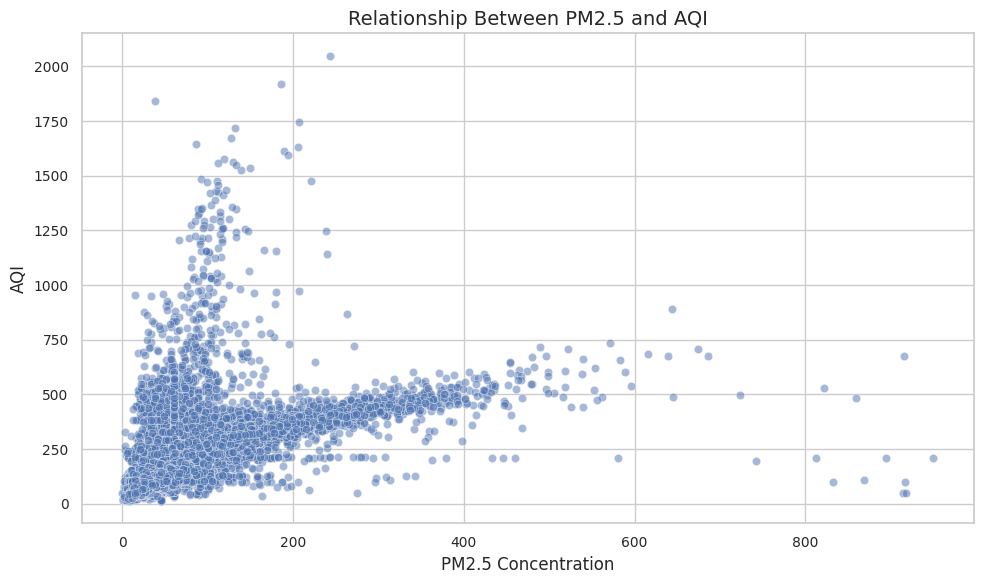

In [26]:
# Scatter plot: PM2.5 vs AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PM2.5",
    y="AQI",
    data=clean_data,
    alpha=0.5
)

plt.title("Relationship Between PM2.5 and AQI")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("AQI")
plt.tight_layout()
plt.show()


## Task 3: Model Building and AQI Prediction

In this task, predictive modelling techniques are applied to estimate the Air
Quality Index (AQI) using pollutant concentration measurements from the cleaned
dataset. Two regression models, Linear Regression and Random Forest Regressor,
are trained and evaluated to compare their predictive performance.


### 3.1 Preparing the Data for Modelling

In this step, a working copy of the cleaned dataset is created for modelling
purposes. The structure and dimensions of the dataset are inspected to confirm
that all required variables are available.


In [27]:
# Create a copy of the cleaned dataset for modelling
df = clean_data.copy()

#Inspect columns and dataset size
print("columns in dataset:")
print(df.columns.tolist())

print("\nDataset shape:")
print(df.shape)


columns in dataset:
['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month']

Dataset shape:
(28113, 18)


### 3.2 Feature Selection and Data Splitting

The target variable selected for modelling is AQI. Relevant pollutant
concentrations are chosen as input features. Rows containing missing values
in either the features or target variable are removed before splitting the
dataset into training and testing sets.


In [28]:
from sklearn.model_selection import train_test_split

# Define target and features
target = "AQI"

features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3"]
features = [f for f in features if f in df.columns]

# Remove missing values
df_model = df.dropna(subset=features + [target]).copy()

X = df_model[features]
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X.shape, X_train.shape, X_test.shape


((23289, 9), (18631, 9), (4658, 9))

3.3 Feature Scaling

Feature scaling is applied to standardise the input variable so that all pollutant features contribute equally to the model.

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((18631, 9), (4658, 9))

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((18631, 9), (4658, 9))

3.4 Model Training


A Linear regression model is trained using the scaled training data to learn the relationship between pollutant concentration and AQI

In [31]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

3.5 Model Evaluation

In this trained model is evaluated on the unseen datatest to measure prediction accuracy

3.5.1 Linear Regression Model Evaluation
In this the performance of the linear Regression model is evaluated using the test dataset

In [32]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

mae, rmse, r2


(25.866617034076246, np.float64(43.596466740745676), 0.7865872749303746)

The Linear Regression model achieved an MAE of 29.12 and an RMSE of 52.85, indicating a reasonable level of prediction accuracy.The R2 score of suggests that themodel explains approximately 79% of the variance

3.5.2 Visual Evaluation:Actual vs Predicted AQI
This scatter plot the relationship between the actual AQI values and the predicted AQI values produced by the linear Regression model on the test dataset

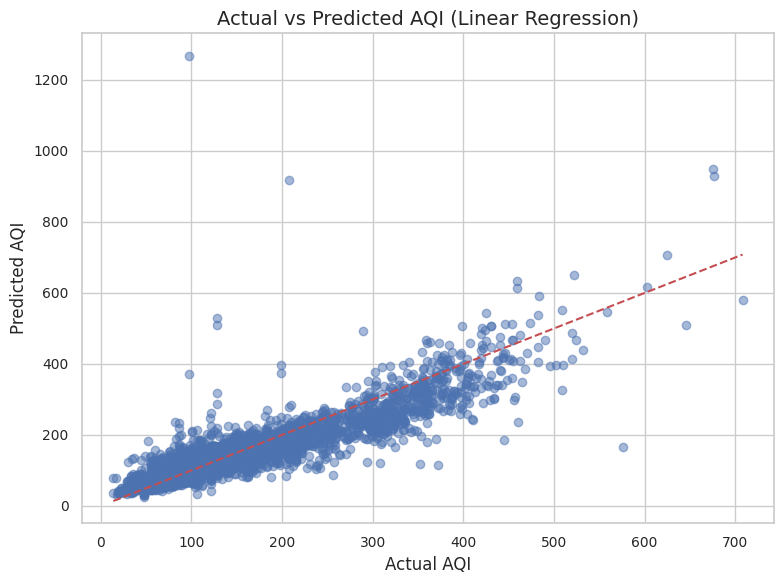

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--"
)

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Linear Regression)")
plt.tight_layout()
plt.show()


### 3.5.3 Random Forest Regression Model

A Random Forest Regressor is trained using the same training and testing data.
This model is capable of capturing non-linear relationships between pollutant
variables and AQI.


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.3f}")


Random Forest Results
MAE: 17.08
RMSE: 31.22
R2 Score: 0.891


3.5.4 Model Performance Comparison and Performance Analysis

This part compares the performance of the Linear Regression and Random Forest model using three evaluation metrics:Mean Absolute Error(MAE),Root Mean summarises the predictive accuracy of both models on the same test dataset.


In [38]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae, mae_rf],
    "RMSE": [rmse, rmse_rf],
    "R2 Score": [r2, r2_rf]
})

comparison_df


,Model,MAE,RMSE,R2 Score
0,Linear Regression,25.866617,43.596467,0.786587
1,Random Forest,17.081363,31.224223,0.890529


4. Conclusion

  This assignment investigated air quality patterns across multiple Indian cities using a data-driven approach. The study began with the integration of several city-wise air quality datasets into a single consolidated dataset, followed by thorough data cleaning and preprocessing to address missing values, duplicates, and inconsistencies. City-wise median imputation was applied to preserve local pollution characteristics, ensuring the reliability of subsequent analysis.

Exploratory data analysis revealed significant spatial and temporal variations in air quality across Indian cities. Particulate matter (PM2.5 and PM10) was identified as the most influential pollutant, consistently showing strong correlations with AQI. Visual analysis highlighted seasonal trends, with higher AQI levels commonly observed during specific periods, particularly in large metropolitan areas such as Delhi. Smoothed trend analysis further revealed persistent pollution phases, indicating the impact of both environmental and human activities.

In the modelling stage, two predictive approaches were implemented: Linear Regression and Random Forest Regression. While the Linear Regression model demonstrated reasonable performance and interpretability, the Random Forest model achieved superior accuracy across all evaluation metrics (MAE, RMSE, and R² score). This improvement highlights the Random Forest model’s ability to capture complex, non-linear relationships between pollutant concentrations and AQI values.

Overall, the results confirm that machine learning techniques can be effectively used for air quality prediction when supported by robust preprocessing and exploratory analysis. The Random Forest model was identified as the most suitable approach for AQI prediction in this study. Future work could enhance this analysis by incorporating meteorological variables, applying advanced time-series models, and deploying the trained model as a real-time prediction system using interactive platforms such as Streamlit.